# Classification Challenge in Python


# Introduction

The underlying document summarizes our solutions for the second Kaggle Challenge in the course "Machine Learning and Artificial Intelligence".


The challenge itself is a classification task, which means that we use different machine learning approaches to predict a binary target variable instead of a continuous variable as in the first Kaggle Challenge. More precisely, we use a provided dataset to find out whether customers of a bank will churn or not. To investigate this, the dataset provides a number of input variables that can be helpful in predicting how likely it is that someone will leave the bank.

In the following, we test different predictive models by using a split of the provided training dataset. Our goal in doing so is to develop predictive models that accurately classify whether a customer will churn or not. In order to find a good prediction method, we compute several models based on different machine learning approaches such as logistic regression, random forest, support vector machine and neural networks (see chapter: *Methods*). We further compare the models mainly on the basis of the AUC (Area Under the Curve), which measures the model's ability to distinguish between positive and negative classes (see chapter: *Results*). And based on the comparison of the AUC from the data splits of the training data, the AUC we got for the provided testing data by uploading results on Kaggle, the ROC (Receiver Operating Characteristic), and the accuracy of our models we come to the conclusion that our random forest model is best in predicting whether bank costumers churn from the bank or not. Ultimately, the random forest model is used as our main method. To improve the performance of the model, we also enrich the dataset by adding additional features by adding new input variables. A short discussion and summary of the results finally completes our analysis (see chapter: *Discussion*). But first, with the *Dataset* chapter, we begin with an overview of the provided data in order to identify possible correlations between our target variable and the given input variables. In addition to this explanatory analysis, this chapter also offers an overview of our data preparation process.


# Import modules

In [ ]:
# Import basic modules for Data and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

# Import sklearn modules for Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import sklearn modules for Model Evaluation & Improvement
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

# Import module for data separation
from sklearn.model_selection import train_test_split

# Dataset

## import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
train.head()

,ID,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
test.head()

,ID,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,8001,747,Germany,Male,36,8,102603.30,2,1,1,180693.61
1,8002,707,Spain,Male,32,9,0.00,2,1,0,126475.79
2,8003,590,Spain,Male,37,1,0.00,2,0,0,133535.99
3,8004,603,Spain,Male,57,6,105000.85,2,1,1,87412.24
4,8005,615,France,Male,45,5,0.00,2,1,1,164886.64


To make sure no NA value in train and test dataset, we use isna().any() function. The result shows that the data is complete without any NA value for both trai and test data.

In [ ]:
train.isna().any()

ID                  False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [ ]:
test.isna().any()

ID                  False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
dtype: bool

### Basic information of train data

First of all, we check the data type and its structure. And the data types seem to be all correct at first glance that character values refer to object and numeric values refer to either integral or float. Therefore, we don't change the data type here.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8000 non-null   int64  
 1   credit_score      8000 non-null   int64  
 2   country           8000 non-null   object 
 3   gender            8000 non-null   object 
 4   age               8000 non-null   int64  
 5   tenure            8000 non-null   int64  
 6   balance           8000 non-null   float64
 7   products_number   8000 non-null   int64  
 8   credit_card       8000 non-null   int64  
 9   active_member     8000 non-null   int64  
 10  estimated_salary  8000 non-null   float64
 11  churn             8000 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 750.1+ KB


Secondly, we check the overall statistics results of all varibles except categorical ones. There are certain columns with higher standard deviation, which means that the values have wider range, leading to the difficulty of further predictions.

In [ ]:
train.describe()

,ID,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,650.179625,38.937875,5.012750,76800.037193,1.528000,0.701625,0.512625,100198.588701,0.205875
std,2309.54541,96.844314,10.511224,2.884376,62391.192584,0.583102,0.457574,0.499872,57524.002768,0.404365
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2000.75000,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51271.410000,0.000000
50%,4000.50000,651.000000,37.000000,5.000000,97658.060000,1.000000,1.000000,1.000000,100272.165000,0.000000
75%,6000.25000,717.000000,44.000000,7.000000,127827.332500,2.000000,1.000000,1.000000,149372.387500,0.000000
max,8000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Relation between variables

To see the relation plots between variables, we use pairplot function in sns module. The result does not tell us too much about the story in this train data.

Graph 1

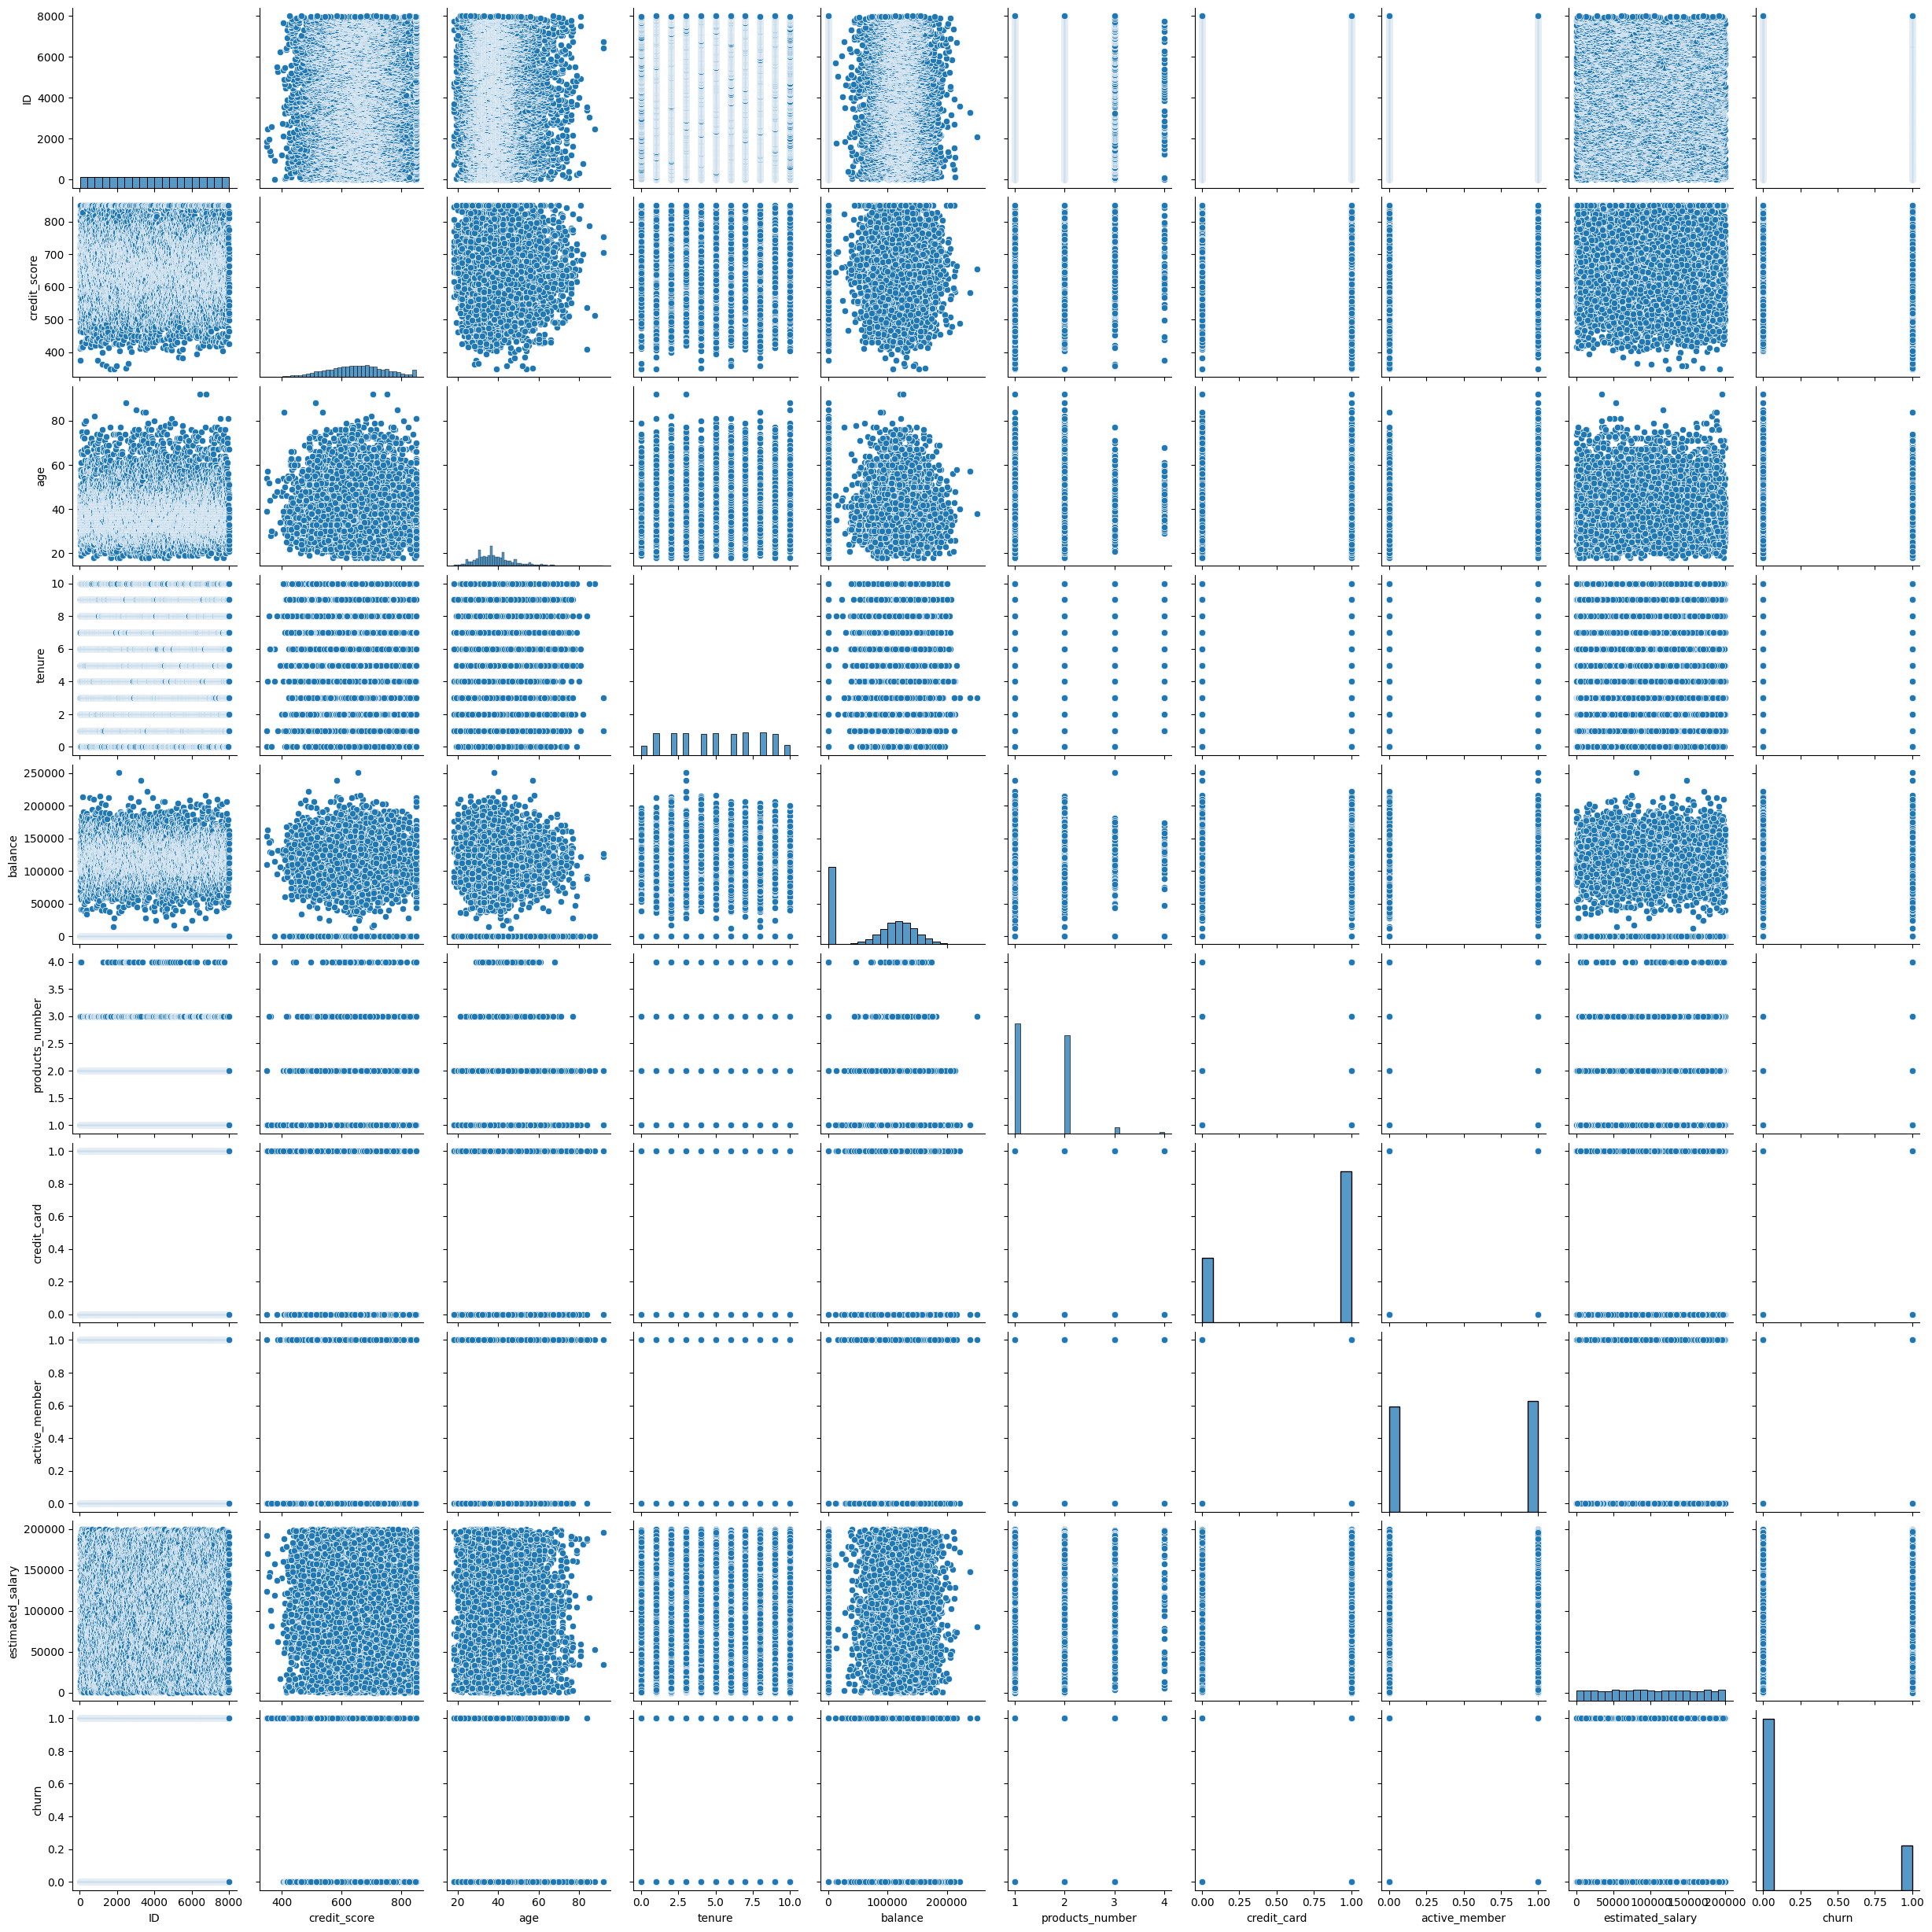

In [ ]:
sns.pairplot(train)

## prepare train and test data

In this subsection, we prepare the dataset for further usage in the method section.

Because categorical values cannot be used to make predictions here, we create the dummy variables for country and gender.

In [ ]:
# create dummy variables for country and gender for train data
dummy_country_train = pd.get_dummies(train['country'], prefix='country')
dummy_gender_train = pd.get_dummies(train['gender'], prefix='gender')

# Combine the dummy variables with the original Dataframe
train2 = pd.concat([train, dummy_country_train, dummy_gender_train], axis=1)

# Exclude non-use columns in train data because of the creation of dummy variables
exclude_variables = ['country', 'gender']
train3 = train2.drop(exclude_variables, axis=1)

# Display the new train data
train3.head()

,ID,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
# create dummy variables for country and gender for test data
dummy_country_test = pd.get_dummies(test['country'], prefix='country')
dummy_gender_test = pd.get_dummies(test['gender'], prefix='gender')

# Combine the dummy variables with the original DataFrame
test2 = pd.concat([test, dummy_country_test, dummy_gender_test], axis=1)

# Exclude non-use columns in test data because of the creation of dummy variable
# in order to match the columns in train dataset
exclude_variables = ['country', 'gender']
test3 = test2.drop(exclude_variables, axis=1)

# Display the new test data
test3.head()

,ID,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,8001,747,36,8,102603.30,2,1,1,180693.61,0,1,0,0,1
1,8002,707,32,9,0.00,2,1,0,126475.79,0,0,1,0,1
2,8003,590,37,1,0.00,2,0,0,133535.99,0,0,1,0,1
3,8004,603,57,6,105000.85,2,1,1,87412.24,0,0,1,0,1
4,8005,615,45,5,0.00,2,1,1,164886.64,1,0,0,0,1


In graph 1, we do not see that much relation between variables, and in previous section where we explore the statistical results of train data, the values in certain columns have higher standard deviation. Therefore, we want to normalize the values in those columns to have better data to do the modeling in the method section.

In [ ]:
# Choose the columns with higher standard deviaiotn to normalize
columns_to_normalize = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

# Initialize the MinMaxScaler function for normalization
scaler = MinMaxScaler()

# Fit and transform the selected columns for both train and test data
train3[columns_to_normalize] = scaler.fit_transform(train3[columns_to_normalize])
test3[columns_to_normalize] = scaler.fit_transform(test3[columns_to_normalize])

After completing the preparation of train dataset, we then further separate the train dataset into train and test data, so that when we try out different prediction models, we can use a part of the train data as test data to see the modeling performance. In this way, we can compare those models and learn the accuracy, ROC, and AUC scores in advance.
At the end, we choose the model with the best result for predicting the real test data that will produce the final results we use to upload on Kaggle.

Besides, we also separate the test data into data for prediction with all variables except ID and the data with only ID for combination with the prediction results.

In [ ]:
# separate train data in order to test the modeling results
exclude_variables2 = ['ID', 'churn']

x = train3.drop(exclude_variables2, axis=1) # as variables for training
y = train3["churn"] # as actual result for training

# create train and test by train data
# x_train and y_train are used for trainging
# x_test and y_test are for testing how well the models perform
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.9, random_state=42)

# prepare test data for prediction and further result export
x_test_forprediction = test3.drop("ID", axis=1) # data used to predict
y_test_forcombining = test3[["ID"]] # data with only ID to combine with predictions

## Description of adjusted dataset

Before we jump into the modeling part, check one last time about the data and make graphs to have a deeper understanding of the dataset.

### Adjusted dataset information

The adjusted data does not have error, and thus we use this data to do the modeling.

In [ ]:
x_train.isna().any()

credit_score        False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
country_France      False
country_Germany     False
country_Spain       False
gender_Female       False
gender_Male         False
dtype: bool

In [ ]:
x_train.dtypes

credit_score        float64
age                 float64
tenure              float64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
country_France        uint8
country_Germany       uint8
country_Spain         uint8
gender_Female         uint8
gender_Male           uint8
dtype: object

In [ ]:
x_train.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.601247,0.282442,0.501639,0.305656,1.526528,0.701111,0.511806,0.502464,0.503750,0.249444,0.246806,0.458333,0.541667
std,0.192825,0.141839,0.288498,0.248700,0.582532,0.457803,0.499895,0.287331,0.500021,0.432722,0.431183,0.498295,0.498295
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.466000,0.189189,0.300000,0.000000,1.000000,0.000000,0.000000,0.258092,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604000,0.256757,0.500000,0.388774,1.000000,1.000000,1.000000,0.504056,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.734000,0.351351,0.700000,0.508705,2.000000,1.000000,1.000000,0.746943,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Histogram

Because categorical values cannot be used to plot the histogram, we first of all choose only numeric values in the dataset. In this histogram graph, there are 3 varibles that are almost as normal distribution, credit score, balance, and age, which means the normalization works because now there is a more clear pattern in our variables.

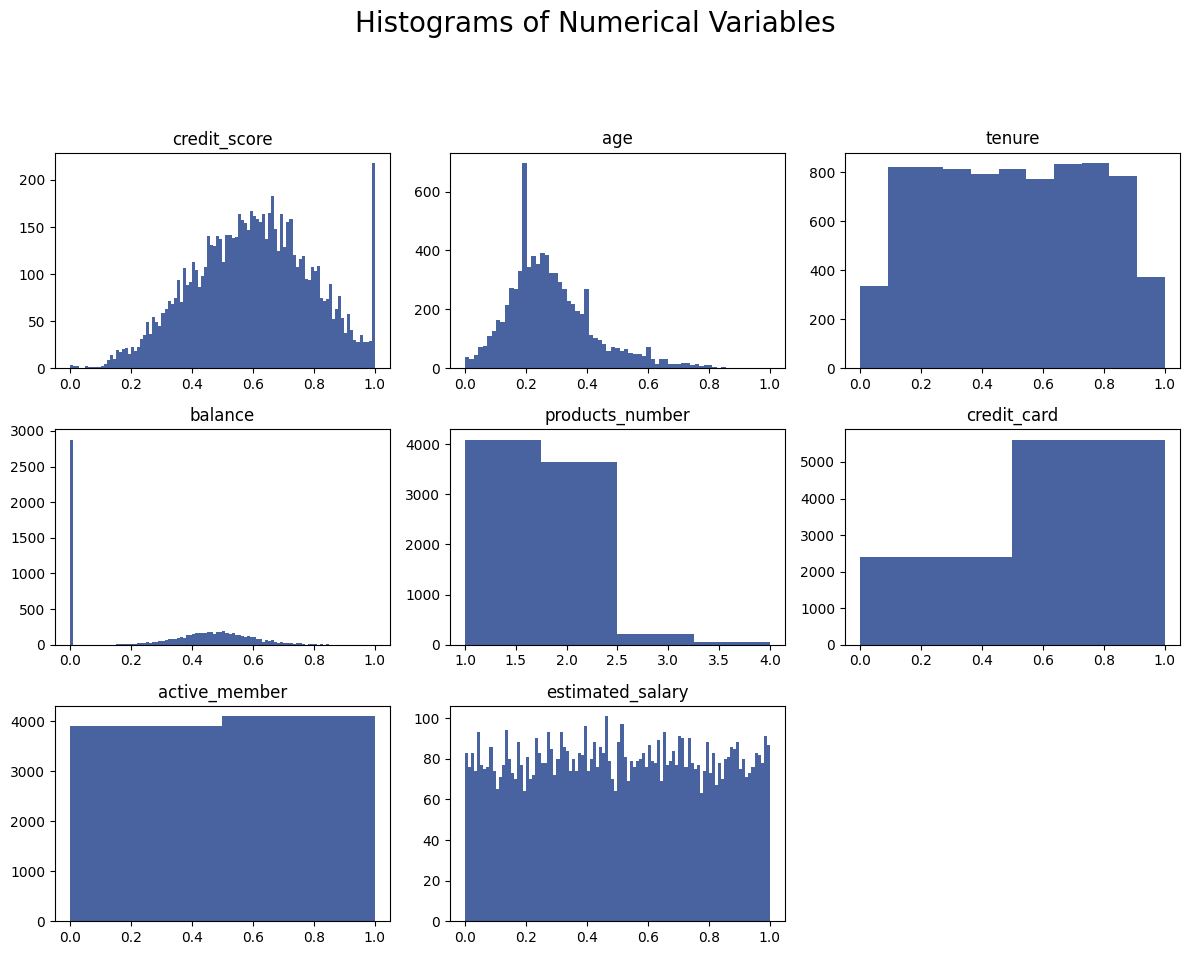

In [ ]:
# plot histogram for train data
# Pick only numeric data
train4 = train3[['credit_score', 'age',
       'tenure', 'balance', 'products_number',
        'credit_card', 'active_member', 'estimated_salary']]

# Histogram:
fig = plt.figure(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables\n', fontsize = 20)
for i in range(train4.shape[1]):
    plt.subplot(3, 3, i + 1)
    z = plt.gca()
    z.set_title(train4.columns.values[i])

    value = np.size(train4.iloc[:, i].unique())
    if value >= 100:
        value = 100

    plt.hist(train4.iloc[:, i], bins=value, color = '#4863A0')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Relation between variables and churn

In this subsection, we want to further see the relation between categorical variables and churn because so far we didn't explore this relation yet.

#### Churn rate by country

As the plot shows, Germany has the highest churn rate, and in France and Spain, the churn rates are similar. Overall, the churn rate in all 3 countries perform quite well, but Germany has rooms to improve.

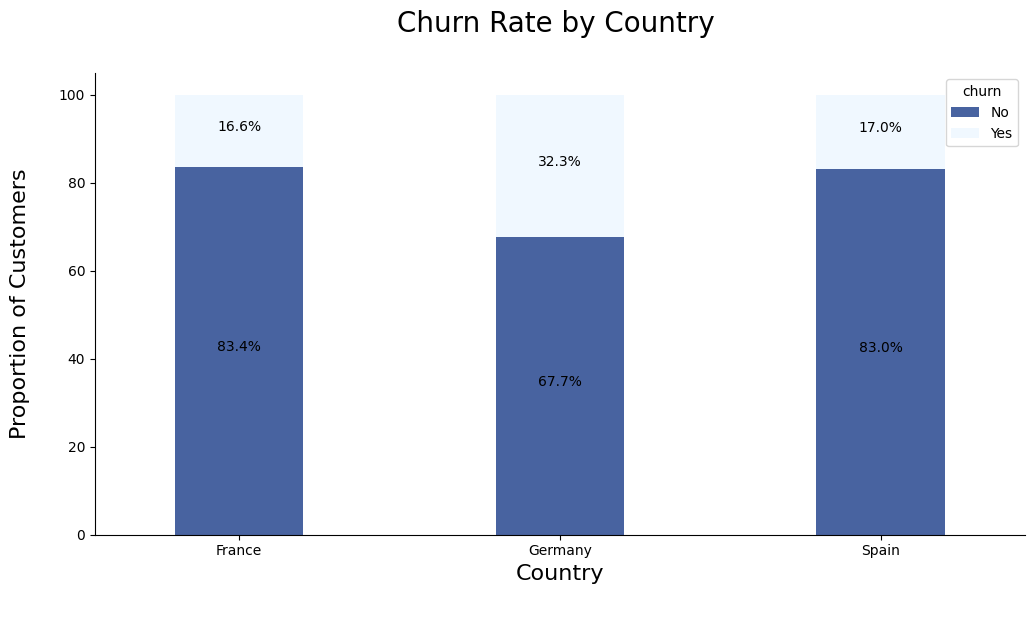

In [ ]:
# Group by country and count the churn
country_churn = train.groupby(['country', 'churn']).size().unstack()

# Rename titles in the legend
country_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

# Set up colors for the bar chart
colors  = ['#4863A0', '#F0F8FF']

# Create bar chart with certain criteria
country_bar = (country_churn.T*100.0 / country_churn.T.sum()).T.plot(kind='bar',
                                                                   width = 0.4,
                                                                   stacked = True,
                                                                   rot = 0,
                                                                   figsize = (12,6),
                                                                   color = colors)

# Set up titles for the plot and axes
plt.title('Churn Rate by Country \n', fontsize = "20")
plt.ylabel('Proportion of Customers\n', fontsize = "16")
plt.xlabel('Country\n', fontsize = "16")

# Put the ratio in the plot
for p in country_bar.patches:
    width, height = p.get_width(), p.get_height()
    a, b = p.get_xy()
    country_bar.text(a + width / 2,
                   b + height / 2,
                   '{:.1f}%'.format(height),
                   horizontalalignment = 'center')

# Hide the top and right spines
hide_spine = plt.gca()
hide_spine.spines['top'].set_visible(False)
hide_spine.spines['right'].set_visible(False)

#### Churn rate by gender

In the bar chart below, we observe that in this dataset, females have a slightly higher churn rate than males.

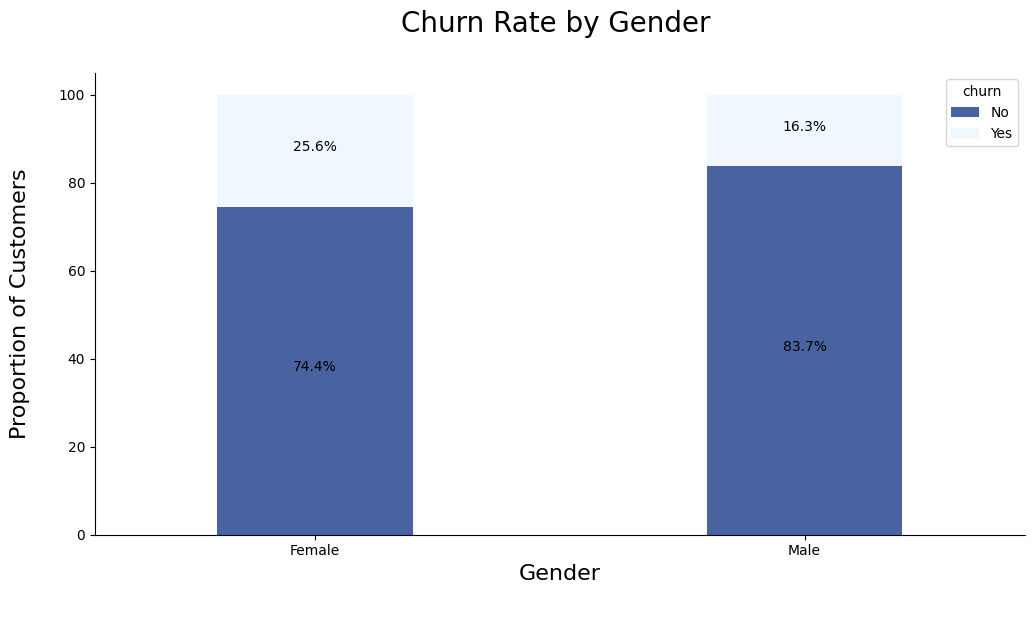

In [ ]:
# Group by gender and count the churn
gender_churn = train.groupby(['gender', 'churn']).size().unstack()

# Rename titles in the legend
gender_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

# Set up colors for the bar chart
colors  = ['#4863A0', '#F0F8FF']

# Create bar chart with certain criteria
gender_bar = (gender_churn.T*100.0 / gender_churn.T.sum()).T.plot(kind = 'bar',
                                                                  width = 0.4,
                                                                  stacked = True,
                                                                  rot = 0,
                                                                  figsize = (12,6),
                                                                  color = colors)

# Set up titles for the plot and axes
plt.title('Churn Rate by Gender \n', fontsize = "20")
plt.ylabel('Proportion of Customers\n', fontsize = "16")
plt.xlabel('Gender\n', fontsize = "16")

# Put the ratio in the plot
for p in gender_bar.patches:
    width, height = p.get_width(), p.get_height()
    c, d = p.get_xy()
    gender_bar.text(c + width / 2,
            d + height / 2,
            '{:.1f}%'.format(height),
            horizontalalignment = 'center')

# Hide the top and right spines
hide_spine = plt.gca()
hide_spine.spines['top'].set_visible(False)
hide_spine.spines['right'].set_visible(False)

## Correlation between variables and churn

After exploring the data structure and the relation between categorical variables and churn, we further dive into the correlations between all variables and churn. The result shows that age, balance, germany, and female have higher correlation with churn, which means if one has higher age, has higher balance in account, live in Germany, or is female, then he/she has higher chance to churn. On the other hand, if one is active member, lives in France, or is male, he/she has negative relation with churn rate, which means they tend not to churn.

For other varibles, the correlations are not too stong but still show some effect on the decision of churn.

In this sense, we decide to keep all variables for now to run the modeling because they all have certain degree of effect on churn decision.

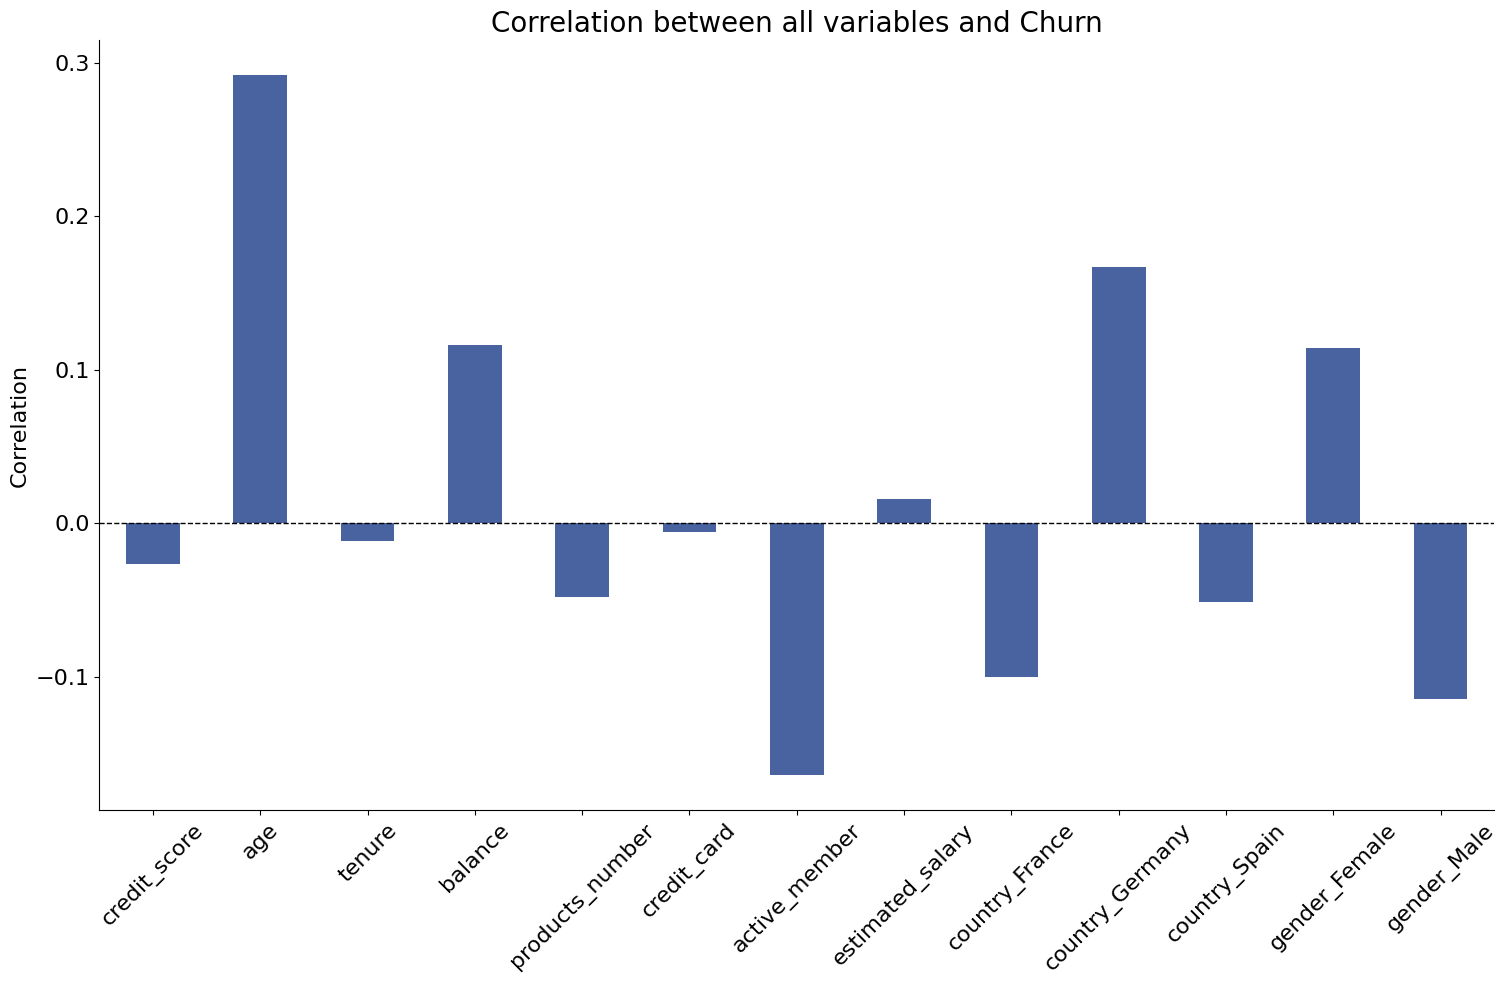

In [ ]:
# Calculate the correlation between churn and other variables
correlations = x.corrwith(train.churn)
correlations = correlations[correlations!=1]

# Plot the correlations in a bar chart
correlations.plot.bar(
        figsize = (18, 10), fontsize = 16, color = '#4863A0',
        rot = 45, grid = False)

plt.title('Correlation between all variables and Churn', fontsize = "20")
plt.ylabel('Correlation', fontsize = "16")

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Hide the top and right spines
hide_spine = plt.gca()
hide_spine.spines['top'].set_visible(False)
hide_spine.spines['right'].set_visible(False)

# Methods

## Model testing

In this subsection, we use logistic regression, random forest, support vector machine, and neural networks to train our models. The reason why we choose these methods in the first place is that all of them are commonly used and widely recognized. Moreover, each of the methods has their own advantages and may fit better in a different dataset. Therefore, in this part, we want to figure out which models can fit our dataset better by comparing the AUC (Area Under Curve), ROC Curve(Receiver Operating Characteristic), and Accuracy.

### Logistic regression

This first chunk is for the display of the basic way logistic regression is used. The reason why we choose logistic regression as the first method is that it can provide probabilities and classify new samples using continuous and discrete measurements. That's also the reason why this method is popular in machine learning.

In [ ]:
# Import the class we need
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instantiate the model
logreg = LogisticRegression(random_state=42, max_iter=10000)

# fit the model with data
logreg.fit(x_train, y_train)

pred_logreg = logreg.predict(x_test)

To make the logistic regression able to predict in a better but not overfitting way, we use tuning and cross validation.

Besides, we set up some parameters range in advance in order to find the best parameters to make predictions.

In [ ]:
# Import the class we need
from sklearn.model_selection import GridSearchCV

# To do tuning and cross validation, we have to define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'max_iter': [100, 150, 500, 1000],  # Maximum number of iterations
}

# Instantiate the logistic regression model
# we set random state 42 for all methods
logreg = LogisticRegression(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='roc_auc')

# Perform the grid search with cross-validation
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best estimator (model with the best hyperparameters)
best_logreg = grid_search.best_estimator_

# Predict on the test set with the best model
pred_logreg = best_logreg.predict(x_test)

Best hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}


Using the function classification_report(), we obtain the follwing report:

In [ ]:
# print out classification report to evaluate the model performance
target_names = ['not churn', 'churn']
print(classification_report(y_test, pred_logreg, target_names=target_names))

              precision    recall  f1-score   support

   not churn       0.81      0.97      0.89       625
       churn       0.68      0.21      0.32       175

    accuracy                           0.81       800
   macro avg       0.75      0.59      0.60       800
weighted avg       0.78      0.81      0.76       800



These results will be summarized and interpreted in the section "Results".

Then we create a confusion matrix for better understanding of the outcome of this model.


Text(0.5, 427.9555555555555, 'Predicted label')

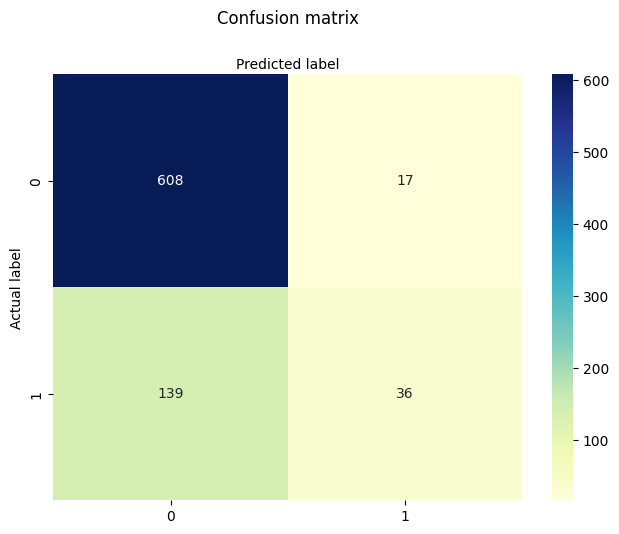

In [ ]:
# Create confusion matrix
cnf_matrix_logreg = metrics.confusion_matrix(y_test, pred_logreg)

# plot the confusion matrix
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot = True, cmap = "YlGnBu" , fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In a confusion matrix, high diagonal values are desireable, since they represent the true positives and true negatives.

Here in our case, we have 36 and 608.

However we recognise here that we have a high number of false nagative (139).

At the same time, the false positive number is very low (17).

With the numbers, we can also calculate:

Sensitivity = True positives / (True positives + False negatives)

-> equal to precision for not churn (0) in classification report

Specificity = True negatives / (True negatives + False positives)

-> equal to precision for churn (1) in classification report

For this model:

Sensitivity = 608 / (608+139) = 0.814

Specificity = 36 / (36+17) = 0.68

When using this model to predict the probability of churn, we further calculate the ROC curve and AUC to evaluate the overall performance. The result shows a relative low AUC score of 0.7216, which means this model's ability to distinguish not churn and churn is relatively low.

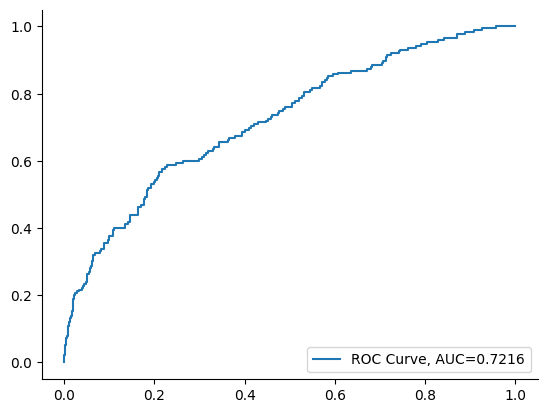

In [ ]:
# Compute the ROC curve and AUC
y_pred_proba = best_logreg.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Prepare the details for the graph
plt.plot(fpr,tpr,label = "ROC Curve, AUC=" + str(auc))
plt.legend(loc = 4) # put legend in right bottom corner

# Hide the top and right spines
hide_spine = plt.gca()
hide_spine.spines['top'].set_visible(False)
hide_spine.spines['right'].set_visible(False)

# plot the graph
plt.show()

If we decide to use this model, then the following code is for the creation of csv file to upload.

In [ ]:
# to export the data as csv file
# predict by using test data
pred_logreg_a = best_logreg.predict_proba(x_test_forprediction)[:,1]

# Convert the NumPy array to a DataFrame (necessary?)
pred_logreg_a = pd.DataFrame(pred_logreg_a, columns = ['churn'])
# Concatenate the arrays
submission_logreg = pd.concat((y_test_forcombining, pred_logreg_a), axis = 1)

# Export the combined DataFrame to a CSV file
submission_logreg.to_csv('/content/drive/MyDrive/Colab Notebooks/submission/submission_logreg.csv', index=False)

### Random forest

The second method we use is random forest method, in which we also use tuning and cross validation to avoid overfitting issues. The specific reason why we choose this methos is because of its nature of simplicity and flexibility, which results in an imporvement in accuracy.

Let's first try out random forest without tuning.

In [ ]:
# create the random forest and train the data
rfc_basic = RandomForestClassifier(n_estimators = 100, random_state=42)
rfc_basic.fit(x_train, y_train)

# make predictions with x_test
rfc_pred_basic = rfc_basic.predict(x_test)

Now, we apply random forest with tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Create a RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv=10)
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_rfc = grid_search.best_estimator_

# Train the best model on the train dataset
best_rfc.fit(x_train, y_train)

# Make predictions on the test set
rfc_pred = best_rfc.predict(x_test)

# Calculate AUC score on the test set           # This part is also coded and ploted further below
#auc_score = roc_auc_score(y_test, rfc_pred)
#print("AUC Score on Test Set:", auc_score)

AUC Score on Test Set: 0.6913142857142857


Using the function classification_report(), we obtain the following report:

In [ ]:
# print out classification report to evaluate the model performance
target_names = ['not churn', 'churn']
print(classification_report(y_test, rfc_pred, target_names=target_names))

              precision    recall  f1-score   support

   not churn       0.86      0.97      0.91       625
       churn       0.80      0.43      0.56       175

    accuracy                           0.85       800
   macro avg       0.83      0.70      0.73       800
weighted avg       0.85      0.85      0.83       800



These results will be summarized and interpreted in the section "Results".

From this confusion matrix, we see an improvement compared to logistic model with more correct predictions on the total amount of the true positives and true negatives.

Text(0.5, 427.9555555555555, 'Predicted label')

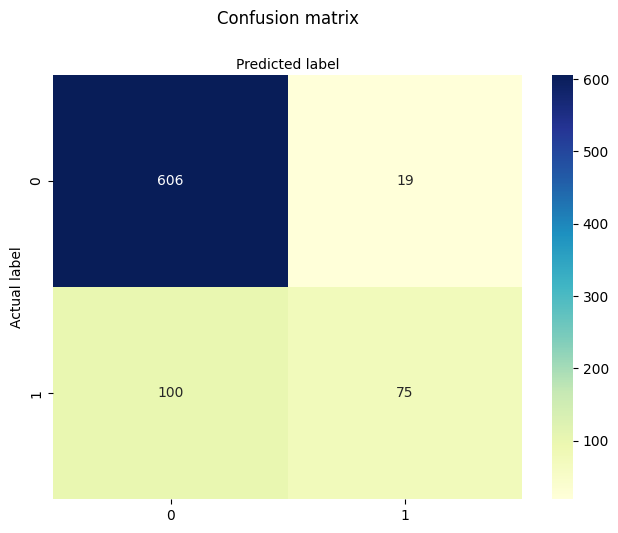

In [ ]:
cnf_matrix_rf = confusion_matrix(y_test, rfc_pred)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot = True, cmap = "YlGnBu" , fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

By computing the ROC curve and AUC, the degree of the concave curve is much higher compared to the ROC curve of logistic regression, which means that AUC is also higher, here 0.834.

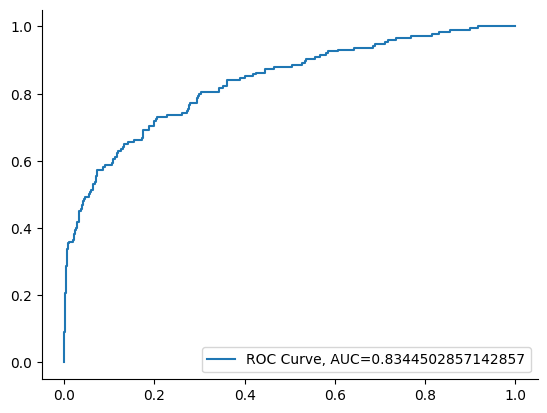

In [ ]:
# Compute the ROC curve and AUC
y_pred_proba_rfc = best_rfc.predict_proba(x_test)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_rfc)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rfc)

# Prepare the details for the graph
plt.plot(fpr2, tpr2, label = "ROC Curve, AUC=" + str(auc))
plt.legend(loc = 4) # put legend in right bottom corner

# Hide the top and right spines
hide_spine = plt.gca()
hide_spine.spines['top'].set_visible(False)
hide_spine.spines['right'].set_visible(False)

# Plot the graph
plt.show()

If we decide to use this model, then the following code is for the creation of csv file to upload.

In [ ]:
# to export the data as csv file

# predict by using test data
#pred_rfc = rfc.predict(x_test_forprediction)
pred_rfc_tuning = best_rfc.predict_proba(x_test_forprediction)[:,1]

# Convert the NumPy array to a DataFrame (necessary?)
pred_rfc_tuning = pd.DataFrame(pred_rfc_tuning, columns=['churn'])

# Concatenate the arrays
submission_rfc_tuning = pd.concat((y_test_forcombining, pred_rfc_tuning), axis=1)

# Export the combined DataFrame to a CSV file
submission_rfc_tuning.to_csv('/content/drive/MyDrive/Colab Notebooks/submission/submission_rfc_tuning.csv', index=False)

###  Support vector machine (SVM)

The third method we choose is support vector machine.

In [ ]:
# create SVM method by poly
svc_basic = SVC(kernel='poly', probability=True, random_state=42)

# fit the data with svc
svc_basic.fit(x_train,y_train)

# make prediction based on separate train data x_test
pred_SVM_basic = svc_basic.predict(x_test)

In [ ]:
# test accuracy
accuracy_score(y_test, pred_SVM_basic)

0.8425

We also do the tuning and cross validation for this method to avoid overfitting. Besides, we use the polynomial kernel to create SVM and use parameter grid to find the best degree of polynomial kernel.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],       # Regularization parameter
    'degree': [2, 3, 4],     # Degree of the polynomial kernel
    'coef0': [0, 1, 2],      # Independent term in the kernel function
}

# Create SVM with polynomial kernel
svc = SVC(kernel='poly', probability=True, random_state=42)

# Use GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_svc = grid_search.best_estimator_

# Make predictions on the test set
pred_SVM_tuned = best_svc.predict(x_test)

# Find the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'C': 1, 'coef0': 2, 'degree': 2}


Using the function classification_report(), we obtain the following report:

In [ ]:
# print out classification report to evaluate the model performance
target_names = ['not churn', 'churn']
print(classification_report(y_test, pred_SVM_tuned, target_names = target_names))

              precision    recall  f1-score   support

   not churn       0.84      0.99      0.91       625
       churn       0.87      0.34      0.49       175

    accuracy                           0.84       800
   macro avg       0.85      0.66      0.70       800
weighted avg       0.85      0.84      0.82       800



In the confusion matrix, we see that overall it looks similar to the random forest results with less accuracy on correct predictions.

Text(0.5, 427.9555555555555, 'Predicted label')

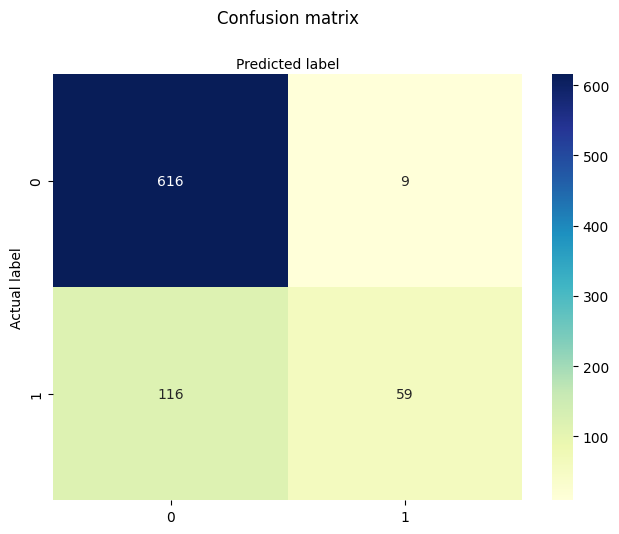

In [ ]:
# plot the confusion matrix
cnf_matrix_SVM_tuned = metrics.confusion_matrix(y_test, pred_SVM_tuned)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_SVM_tuned), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We then see the ROC curve is also quite concave, but the point that the curve becomes more flat is earlier than random forest method. The AUC score is 0.813, which is lower than random forest but better than logistic regression.

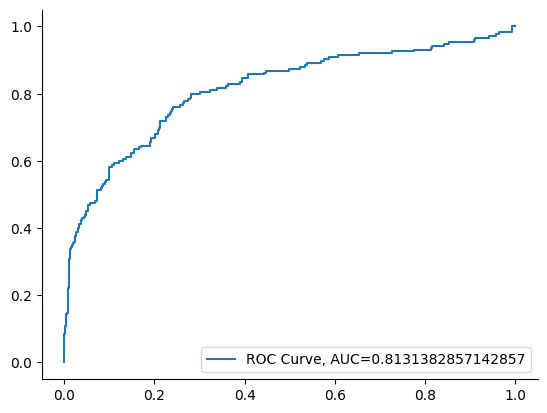

In [ ]:
# Compute the ROC curve and AUC
y_pred_proba_svm = best_svc.predict_proba(x_test)[:,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_svm)
auc = metrics.roc_auc_score(y_test, y_pred_proba_svm)

# prepare the details for the graph
plt.plot(fpr3, tpr3, label = "ROC Curve, AUC=" + str(auc))
plt.legend(loc = 4) # put legend in right bottom corner

# Hide the top and right spines
hide_spine = plt.gca()
hide_spine.spines['top'].set_visible(False)
hide_spine.spines['right'].set_visible(False)

# show the plot
plt.show()

If we decide to use this model, then the following code is for the creation of csv file to upload.

In [ ]:
# to export the data as csv file

# predict by using test data
#pred_rfc = rfc.predict(x_test_forprediction)
pred_svm_tuning = best_svc.predict_proba(x_test_forprediction)[:,1]

# Convert the NumPy array to a DataFrame (necessary?)
pred_svm_tuning = pd.DataFrame(pred_svm_tuning, columns=['churn'])

# Concatenate the arrays
submission_svm_tuning = pd.concat((y_test_forcombining, pred_svm_tuning), axis=1)

# Export the combined DataFrame to a CSV file
submission_svm_tuning.to_csv('/content/drive/MyDrive/Colab Notebooks/submission/submission_svm_tuning.csv', index=False)

### Neural Networks

The last method we use in training model is neural networks method. As this method has hidden layers, it can make better predicitons compared to other methods that have only input and output layers. And neural networks learn the way a human does. However, in reality, this method requires massive computing power, which is costly. Besides, it normally works better with an extremely large dataset.

Since we would still like to know if our dataset works well with the neural networks model, we will try it in the following.

We firstly set up layers with relu and sigmoid activation function for neurons to apply the activation function to the input they receive because activation function is essential for neural networks to learn complex patterns.

Then we add more details to compile the model with optimizer, loss, and metrics.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: 'sigmoid'; multi-class: 'softmax'
])

# Compile the model
model.compile(optimizer='adam',  # Optimizers: 'adam', 'sgd' or 'rmsprop'
              loss='binary_crossentropy',  # Options: 'binary_crossentropy', 'categorical_crossentropy'(for multi-class)
              metrics=[tf.keras.metrics.AUC()])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # adjust epochs and batch_size

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Make binary predictions by applying a threshold
threshold = 0.5
predictions_nn = (model.predict(x_test) > threshold).astype(int)

Epoch 1/10
180/180 [==============================] - 2s 4ms/step - loss: 0.4764 - auc: 0.6779 - val_loss: 0.4614 - val_auc: 0.7072
Epoch 2/10
180/180 [==============================] - 0s 3ms/step - loss: 0.4350 - auc: 0.7555 - val_loss: 0.4351 - val_auc: 0.7543
Epoch 3/10
180/180 [==============================] - 1s 3ms/step - loss: 0.4094 - auc: 0.7965 - val_loss: 0.4149 - val_auc: 0.7908
Epoch 4/10
180/180 [==============================] - 0s 2ms/step - loss: 0.3900 - auc: 0.8204 - val_loss: 0.4094 - val_auc: 0.8077
Epoch 5/10
180/180 [==============================] - 0s 3ms/step - loss: 0.3759 - auc: 0.8343 - val_loss: 0.3803 - val_auc: 0.8265
Epoch 6/10
180/180 [==============================] - 1s 3ms/step - loss: 0.3653 - auc: 0.8442 - val_loss: 0.3753 - val_auc: 0.8292
Epoch 7/10
180/180 [==============================] - 1s 3ms/step - loss: 0.3559 - auc: 0.8526 - val_loss: 0.3635 - val_auc: 0.8400
Epoch 8/10
180/180 [==============================] - 1s 5ms/step - loss: 0.

In this chunk, we try to improve this method by scaling the dataset and adding more details of activation function. And the result we obtain is slightly better than the previous result with less details.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Architecture
model2 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and a lower learning rate
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC()])

# Train the model with more epochs
model2.fit(x_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Get probability predictions for the positive class
probabilities_nn = model2.predict(x_test_scaled)

# Assuming probabilities_nn is a 2D array with shape (num_samples, 1)
# Flatten the array to get a 1D array
probabilities_nn = np.squeeze(probabilities_nn)


# Make binary predictions by applying a threshold
threshold = 0.5
predictions_nn = (probabilities_nn > threshold).astype(int)

# Display the probability predictions
# print("Probability Predictions:")
# print(probabilities_nn)

Epoch 1/20
180/180 [==============================] - 8s 12ms/step - loss: 0.5280 - auc_1: 0.7491 - val_loss: 0.4220 - val_auc_1: 0.8082
Epoch 2/20
180/180 [==============================] - 1s 8ms/step - loss: 0.3858 - auc_1: 0.8209 - val_loss: 0.3742 - val_auc_1: 0.8267
Epoch 3/20
180/180 [==============================] - 1s 3ms/step - loss: 0.3672 - auc_1: 0.8391 - val_loss: 0.3755 - val_auc_1: 0.8305
Epoch 4/20
180/180 [==============================] - 1s 4ms/step - loss: 0.3584 - auc_1: 0.8468 - val_loss: 0.3606 - val_auc_1: 0.8418
Epoch 5/20
180/180 [==============================] - 1s 5ms/step - loss: 0.3467 - auc_1: 0.8558 - val_loss: 0.3581 - val_auc_1: 0.8426
Epoch 6/20
180/180 [==============================] - 1s 5ms/step - loss: 0.3487 - auc_1: 0.8567 - val_loss: 0.3597 - val_auc_1: 0.8401
Epoch 7/20
180/180 [==============================] - 1s 5ms/step - loss: 0.3402 - auc_1: 0.8655 - val_loss: 0.3591 - val_auc_1: 0.8414
Epoch 8/20
180/180 [===========================

Using the function classification_report(), we obtain the following report:

In [ ]:
# print out classification report to evaluate the model performance
target_names = ['not churn', 'churn']
print(classification_report(y_test, predictions_nn, target_names = target_names))

              precision    recall  f1-score   support

   not churn       0.87      0.95      0.91       625
       churn       0.73      0.48      0.58       175

    accuracy                           0.85       800
   macro avg       0.80      0.72      0.74       800
weighted avg       0.84      0.85      0.84       800



We also create the confusion matrix that shows the worse result in predicting true positives (not churn), but overall the accuracy is acceptable.

Text(0.5, 427.9555555555555, 'Predicted label')

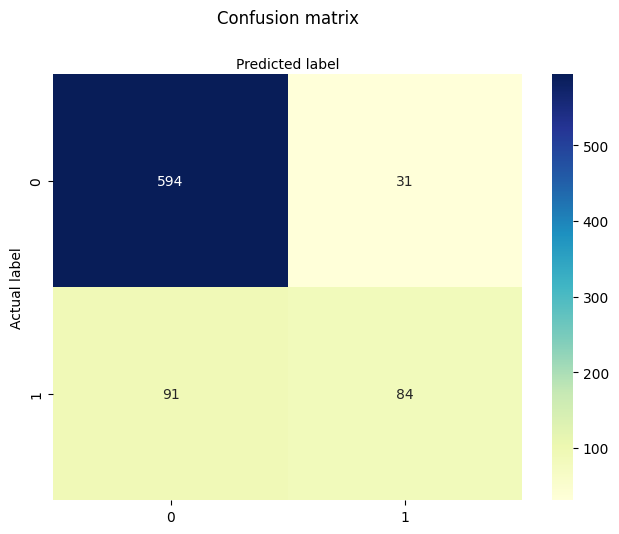

In [ ]:
# plot the confusion matrix
cnf_matrix_nn = metrics.confusion_matrix(y_test, predictions_nn)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

On the other hand, the AUC score is quite good, which is 0.827.

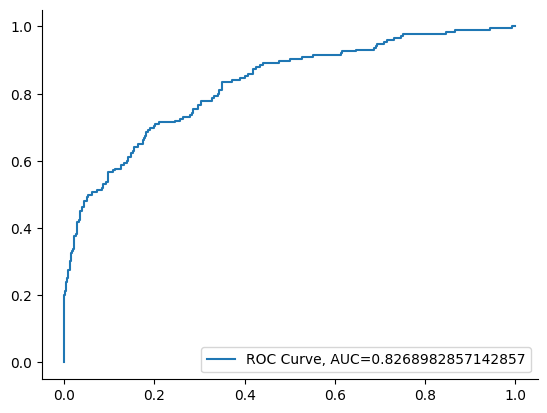

In [ ]:
# Compute the ROC curve and AUC
fpr4, tpr4, _ = metrics.roc_curve(y_test,  probabilities_nn)
auc = metrics.roc_auc_score(y_test, probabilities_nn)

# Prepare the details for the graph
plt.plot(fpr4, tpr4, label = "ROC Curve, AUC=" + str(auc))
plt.legend(loc = 4) # put legend in right bottom corner

# Hide the top and right spines
hide_spine = plt.gca()
hide_spine.spines['top'].set_visible(False)
hide_spine.spines['right'].set_visible(False)

# plot the graph
plt.show()

If we decide to use this model, then the following code is for the creation of csv file to upload.

In [ ]:
# to export the data as csv file

# predict by using test data
pred_nn = model2.predict(x_test_forprediction)

# Convert the NumPy array to a DataFrame (necessary?)
pred_nn = pd.DataFrame(pred_nn, columns=['churn'])

# Concatenate the arrays
submission_nn = pd.concat((y_test_forcombining, pred_svm_tuning), axis=1)

# Export the combined DataFrame to a CSV file
submission_nn.to_csv('/content/drive/MyDrive/Colab Notebooks/submission/submission_nn.csv', index=False)

63/63 [==============================] - 0s 2ms/step


### All models testing

After trainning models one by one, we upload the results on Kaggle, and receive the highest score of 0.84 by the model trained with random forest. We then combine all the methods we use to have a thorough review of the performances of all models. The result shows that random forest fits the best with this dataset, which matches our modeling results.

**Therefore, in this challenge, we use random forest as our main method for other model trainings with more variables we define.**

**NOTE**: We cannot find a way to incorporate also the neural networks model in this comparison matrix, but it does not affect our final model seleciton because from the results we obtained through one-by-one modeling tests, the highest AUC and kaggle score still belong to random forest model.

In [ ]:
# Using Accuracy and ROC AUC Mean Metrics
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 42,
                                                         class_weight='balanced')))
models.append(('Kernel SVM', SVC(kernel = 'poly', random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 42)))
#models.append(('Neural Networks', MyKerasClassifier(build_fn=model2,
 #                                                   epochs=10, batch_size=32, verbose=0)))

# Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, x_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, x_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Random Forest,85.69,1.31,86.12,1.19
1,Kernel SVM,82.99,2.16,85.12,1.29
0,Logistic Regression,77.88,1.92,71.94,2.41


### First conclusion: method of choice

With all the method testings above, random forest method has best ROC and AUC results. Besides, the accuracy score is also pretty high. Therefore, for the following testing, we stay with random forest algorithm to dive deeper into the dataset with self-defined new variables.

## Model training for better AUC score

### Create new potential variables

Before we create new variables, we check the correlation between all variables.

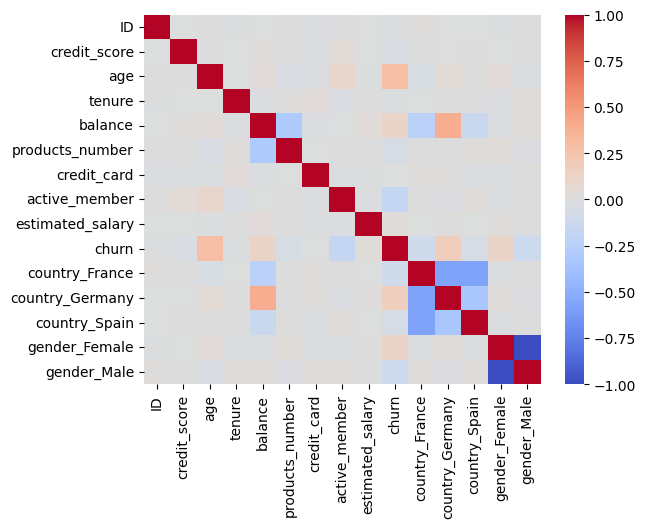

In [ ]:
corr = train3.corr()
sns.heatmap(corr, cmap = 'coolwarm')
plt.show()

From the above heatmap, we observe that certain variables have correlations with each other. We use these variables to create new features in order to capture non-linear relationships. However, we do not choose all of them because too many new defined variables may make the model too complex.


In [ ]:
# A constant of really small number is added to prevent infinite value
# (so that the denominator is not 0)
constant = 1e-6

# Create new variables for both train and test data
train3['balance_per_product'] = train3.balance/(train3.products_number + constant)
train3['balance_by_est_salary'] = train3.balance/(train3.estimated_salary + constant)
train3['tenure_age_ratio'] = train3.tenure/(train3.age + constant)

test3['balance_per_product'] = test3.balance/(test3.products_number + constant)
test3['balance_by_est_salary'] = test3.balance/(test3.estimated_salary + constant)
test3['tenure_age_ratio'] = test3.tenure/(test3.age + constant)

We then create train and test data by train data with new variables for further model training.

In [ ]:
# separate train data in order to test the modeling results
exclude_variables2 = ['ID', 'churn']

x_new = train3.drop(exclude_variables2, axis=1) # as variables for training
y_new = train3["churn"] # as actual result for training

# create train and test by train data
# x_train_new and y_train_new are used for trainging
# x_test_new and y_test_new are for testing how well the models perform
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new,
                                                                    train_size = 0.9, random_state = 42)

# prepare test data for prediction and further result export
x_test_forprediction_new = test3.drop("ID", axis=1) # data used to predict
y_test_forcombining_new = test3[["ID"]] # data with only ID to combine with predictions

### Random forest

We use a similar way to train the model again with a new set of variables. Here we also set the random state equal to 42 so that we can have the same data set for training.

In [ ]:
rfc = RandomForestClassifier()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv=10)
grid_search.fit(x_train_new, y_train_new)

# Get the best model from the grid search
best_rfc = grid_search.best_estimator_

# Train the best model on the full training set
best_rfc.fit(x_train_new, y_train_new)

# Make predictions on the test set
rfc_pred_new = best_rfc.predict(x_test_new)

With this result, we see an improvement, especially in churn section regarding the precision. Besides, the recall value also performs well.

Additionaly, the accuracy score by this model is 0.86, which is the highest score so far. The reason for that may be that with more variables, the model trained by random forest method is able to try out more ways of combination.

In [ ]:
# print out classification report to evaluate the model performance
target_names = ['not churn', 'churn']
print(classification_report(y_test_new, rfc_pred_new, target_names=target_names))

              precision    recall  f1-score   support

   not churn       0.86      0.97      0.91       625
       churn       0.82      0.44      0.57       175

    accuracy                           0.86       800
   macro avg       0.84      0.71      0.74       800
weighted avg       0.85      0.86      0.84       800



In this confusion matrix, the performance also improves because we see that the number of false negatives drops below 100.

Text(0.5, 427.9555555555555, 'Predicted label')

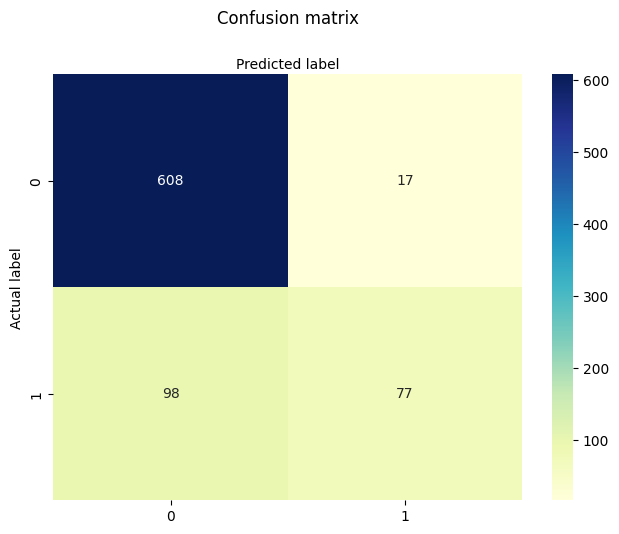

In [ ]:
cnf_matrix_rf_new = confusion_matrix(y_test_new, rfc_pred_new)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf_new), annot = True, cmap = "YlGnBu" , fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

However, in terms of AUC score, this model does not outperform the original model trained also by random forest method. The reason may be that the range we choose to build the random forest may be limited or already too much. Or it's also possible that with current variables we have, the model has reached the limit that cannot be improved that much. Therefore, the result does not show a good improvement.

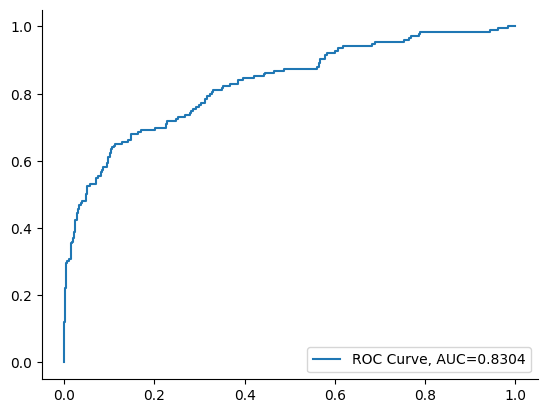

In [ ]:
# Compute the ROC curve and AUC
y_pred_proba_rfc_new = best_rfc.predict_proba(x_test_new)[:,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test_new,  y_pred_proba_rfc_new)
auc = metrics.roc_auc_score(y_test_new, y_pred_proba_rfc_new)

# Prepare the details for the graph
plt.plot(fpr5, tpr5, label = "ROC Curve, AUC=" + str(auc))
plt.legend(loc = 4) # put legend in right bottom corner

# Hide the top and right spines
hide_spine = plt.gca()
hide_spine.spines['top'].set_visible(False)
hide_spine.spines['right'].set_visible(False)

# Plot the graph
plt.show()

At the end, we decide to use this model, and use the following code for the creation of csv file to upload. By this model, we reach 0.85 as our highest score in Kaggle.

In [ ]:
# to export the data as csv file

# predict by using test data
#pred_rfc = rfc.predict(x_test_forprediction)
pred_rfc_tuning_new = best_rfc.predict_proba(x_test_forprediction_new)[:,1]

# Convert the NumPy array to a DataFrame (necessary?)
pred_rfc_tuning_new = pd.DataFrame(pred_rfc_tuning_new, columns=['churn'])

# Concatenate the arrays
submission_rfc_tuning_new = pd.concat((y_test_forcombining_new, pred_rfc_tuning_new), axis=1)

# Export the combined DataFrame to a CSV file
submission_rfc_tuning_new.to_csv('/content/drive/MyDrive/Colab Notebooks/submission/submission_rfc_tuning_new.csv', index=False)

# Results

The results of each model are already presented in the previous section "Methods" directly after running each model. This includes the confusion matrices of each model and the plots of the ROC curves.

Here in this section, we will not repeat presenting them again, instead, we focus on summarising and interpreting the results of classification reports and auc scores, so that we can compare all models we used and justify our final model selection.

## Summary of the results of all models

### AUC score comparison

In general, the AUC (Area Under the Curve) scores represent the performance of different models. It is a commonly used metric in binary classification tasks that measures the quality of a model's predictions.

From all of our models in section "Methods", we collect the calculated AUC Scores (on Test Sets):
*   logistic regression with tuning: 0.7216
*   random forest with tuning: 0.8344502857142857
*   random forest with tuning and additional variables: 0.8304
*   support vector machine with tuning: 0.8131382857142857
*   Neural networks: 0.8268982857142857

Comparing these scores, we can see that the random forest models (with and without additional variables) have higher AUC scores compared to logistic regression, SVM, and neural networks. This suggests that random forest models are better at distinguishing between positive and negative instances in this particular task.

### Comparing models using classification_report

**Note**: These reports below all come from the section "Methods", the corresponding code parts can be found there.

#### Logistic regression with tuning

               precision    recall  f1-score   support

    not churn       0.81      0.97      0.89       625
    churn           0.68      0.21      0.32       175
    accuracy                            0.81       800
    macro avg       0.75      0.59      0.60       800
    weighted avg    0.78      0.81      0.76       800

The above report can be interpreted as following:
1. For the class "not churn", the precisions reach 0.81 which is already a pretty good result because it means within all the predictions that one will not churn, 81% of them do not churn. On the other hand, the prediction for class "churn" only has the precision of 0.68.
2. For recall, the results are quite different in not churn and churn parts. For those who do not churn as actual result, the prediction outcome of this model is 97% correct (which means 97% of the people who actually churn are correctly prediced by us in the group "not churn"). However, for those who do churn, only 21% of the outcome are correct predicitons.
3. The F1 score considers both precision and recall. For the group "not churn", the F1 score is relativly high (0.89), this indicates that there is a balance between precision and recall. For the group "churn", the F1 score is only 0.32 und thus not that high, because although the precision is high, the recall is very low there.
4. In terms of accuracy, the overall result is 0.81, which is also a good result, meaning that for all predictions, 81% of them are correct including both not churn and churn.

#### Random forest with tuning

               precision    recall  f1-score   support

    not churn       0.86      0.97      0.91       625
    churn           0.80      0.43      0.56       175
    accuracy                            0.85       800
    macro avg       0.83      0.70      0.73       800
    weighted avg    0.85      0.85      0.83       800

This classification report tells us:
1. The precision for predicting the class "not churn" is 86%, which means 86% of those who we predicted to be churning actually churn at the end.
This precision is higher compared to the result of logistic regression (which was 81%).
2. The recall score for predicting the class "churn" also largely improves (from 21% in the logistic regression model to 43% now). This tells us that of all customers of the bank who will actually churn, we can now correctly predict more of them to be in the class "churn".
3. The F1 scores also show better results, which means a better balance in precision and recall. This is not suprising since all the precisions and recalls of the random forest model outperform the ones of the logistic regression model.
4. Additionally, accuracy in this model is 85%, which is a very good result.

To sum up, in our case, the random forest model is better than the logistic regression model.

The reason for that may be the fact that with the natures of random forest, which are bootstrapping and bagging, this method has higher flexibility and range in variable selections, leading to more comprehensive training compared to the likelihood maximization of logistic regression.

#### Support vector machine (SVM)

              precision    recall  f1-score   support

    not churn       0.84      0.99      0.91       625
    churn           0.87      0.34      0.49       175

    accuracy                            0.84       800
    macro avg       0.85      0.66      0.70       800
    weighted avg    0.85      0.84      0.82       800

The result above shows that in terms of prediction the class "not churn", SVM method is better than logistic regression but slightly worse than random forest method. However, in terms of predicting the class "churn", it's better than both logistic regression and random forest method.

The reason can be that because neighbors have higher impact in SVM method in classification process, there is a chance that the class "churn" has good influence as neighbors, and thus more predictions can be correctly classified into the class "churn".

Besides that, accuracy is 84%, which is also a good result but slightly worse than random forest method.

#### Neural Networks

              precision    recall  f1-score   support

    not churn       0.87      0.95      0.91       625
    churn           0.73      0.48      0.58       175

    accuracy                            0.85       800
    macro avg       0.80      0.72      0.74       800
    weighted avg    0.84      0.85      0.84       800

For the neural networks model, we get the above report.

Here, we observe that for the class "not churn", the results are similar to previous method, while the prediction for class "churn" is much worse in terms of precision.

For the recall score, the result in the "not churn" section has no big difference compared to the previous result of different methods; while the churn part has good improvement to 0.48.

The accurracy of this model is 0.85.

#### Random forest with tuning and with additional variables



Until now, our best model is random forest with tuning, when we consider both the reports and the AUC scores.

Intending to improve our best-performing model so far, in the section "Model training for better AUC score", we tried out if additional variables would help us to improve the performance even more, and that gives us another well performing random forest model.

We observe the following results:


                 precision    recall  f1-score   support

    not churn         0.86      0.97      0.91       625
    churn             0.82      0.44      0.57       175
    accuracy                              0.86       800
    macro avg         0.84      0.71      0.74       800
    weighted avg      0.85      0.86      0.84       800


Although additional variables bring us an improvement in the accuracy and the ability in predicting the positive class "churn", which makes it a better model, in certain cases in practice, the user is more interested in correctly predicting customers with high possibility of churning.

But in our case, we will focus on the AUC score, so the random forest model with tuning and without additional variables would be our final choice.

## Final model selection

Based on the above results, we decided to use the random forest model with tuning for our final prediction, since it gives us the highest AUC socre. Besdies, for these multi-variables dataset, the simplicity and flexibility of random forest method is what we need to have better modeling performance.


## Final model result

As we have already seen above, our random forest model with tuning gives us the following results:

1. the precisions of respectively 0.86 and 0.80 for recognising not churn and churn (86% of those who we predicted not to be churning actually do not churn and 80% of those who we predicted to be churning actually do churn).

2. The recall of 0.97 and 0.43 tell us, that of all the customers who do not churn, we correctly predicted 97% of them, and of all the customers who churn, we correctly predicted 43% of them.

3. Since our precisions and recalls are relativly balanced, we get relative high f1-scores (0.91 and 0.56)

4. The accuracy of this model is 85%, which is also one of our best results.


                precision    recall  f1-score   support

    not churn        0.86      0.97      0.91       625
    churn            0.80      0.43      0.56       175
    accuracy                             0.85       800
    macro avg        0.83      0.70      0.73       800
    weighted avg     0.85      0.85      0.83       800


The AUC score of this model is 0.8344502857142857.

# Discussion

## Summarize challenge

In this challenge, we use different methods to train the model to have better prediction on churn or not churn from the customers. Not only in banking, but also in other industry, it's always one of the most important things to keep the customers staying with our company. Therefore, being able to apply these model training methods is important as a analysist. To summarize, this challenge gives us a good chance to practice the problem we may face in the future and help us understand the importance of being an analysist.

## Conclusion

To conclude, we made use of following models: Logistic Regression, Random Forest, Support Vector Machine and Neural Network (with and without tuning) and also tried out effects of adding additional variables.
To be able to calculate AUC scores to better compare models, we seperated the given training dataset into a training dataset and a testing dataset (so that we also have the actual result for the testing dataset and can calculate different scores.)

Based on AUC scores, our random Forest model with tuning was the most accurate (0,834) model. However, when choosing the best model it is also important to look at the precision of the predictions and not only the accuracy. Our random Forest model is a bit better at predicting people that don't churn (86%) than at predicting people that churn (0,80) but both are good scores which is also suggested by our f1-scores (0.91 and 0.56).

The adding of new variables did not make the random forest model more accurate (0.830) but it was still better than the other models. Our worst model was logistic regression (0.721). Which suggests that the created variables were not that relevant for the prediction of positive or negative churn. The Neural Networks (0,826) and Support Vector machine (0,81) models had AUC scores close to the random forest model. In a real scenario it would be important to give sensitivity and specificity more attention when deciding for a good model. It has to be decided whether it is more important to be precise when predicting churning or not churning in the process of choosing. But in our case the AUC score was most important for a good rank on the leaderboard which is why we chose our model based on that.